Задача 1

In [71]:
import numpy
from cvxopt import matrix, solvers

P = matrix(numpy.diag([1,4]), tc='d') #квадратичная часть
q = matrix(numpy.array([-8,-16]), tc='d')#линейная часть
G = matrix(numpy.array([[1,1],[1,0],[-1,0],[0,-1]]), tc='d')#ограничения
h = matrix(numpy.array([5,0,3,0]), tc='d')# вектор правой части 

sol = solvers.qp(P,q,G,h)#решение

print(sol['x'])
print(sol['primal objective'])


     pcost       dcost       gap    pres   dres
 0: -4.2903e+01 -4.3526e+01  5e+01  9e-01  3e-01
 1: -3.2325e+01 -3.6864e+01  5e+00  3e-02  9e-03
 2: -3.1999e+01 -3.2217e+01  2e-01  5e-04  2e-04
 3: -3.2000e+01 -3.2003e+01  3e-03  5e-06  2e-06
 4: -3.2000e+01 -3.2000e+01  3e-05  5e-08  2e-08
Optimal solution found.
[ 2.97e-08]
[ 4.00e+00]

-32.00000023722955


Задача 2

     pcost       dcost       gap    pres   dres
 0: -9.0449e+01  1.7839e+02  9e+02  4e+00  2e+01
 1:  6.2210e+01 -4.8671e+01  1e+02  4e-01  3e+00
 2:  1.2558e+01 -4.4509e+00  2e+01  5e-02  3e-01
 3:  5.5027e+00  4.0555e-01  6e+00  1e-02  8e-02
 4:  3.2069e+00  1.8311e+00  2e+00  2e-03  2e-02
 5:  2.6137e+00  2.2634e+00  4e-01  2e-04  1e-03
 6:  2.4580e+00  2.3830e+00  8e-02  2e-05  2e-04
 7:  2.4187e+00  2.4166e+00  2e-03  2e-07  1e-06
 8:  2.4176e+00  2.4176e+00  2e-05  2e-09  1e-08
 9:  2.4176e+00  2.4176e+00  2e-07  2e-11  1e-10
Optimal solution found.


ValueError: shapes (100,2) and (103,1) not aligned: 2 (dim 1) != 103 (dim 0)

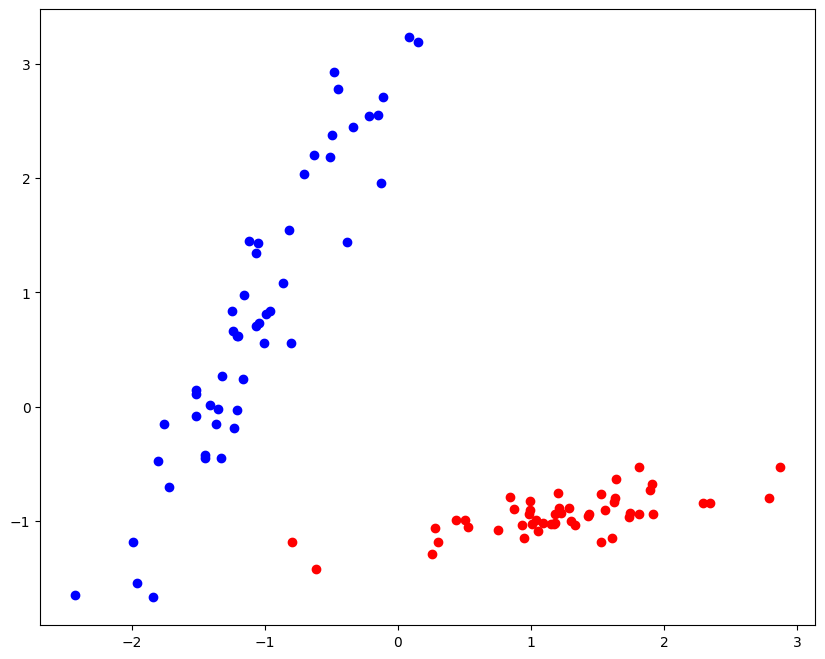

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.utils import check_random_state, check_array
from sklearn.svm import LinearSVR, SVR, _libsvm
from sklearn.datasets import load_iris, load_diabetes, load_wine, load_breast_cancer
from sklearn.datasets import make_classification, make_circles, make_moons


def linear_svm_qp(X, y, C):
    

    N, d = X.shape
    
    P = matrix(np.block([[np.eye(d), np.zeros((d, N+1))], [np.zeros((N+1, d+N+1))]]))
    q = matrix(np.hstack([np.zeros(d+1), C * np.ones(N)]))
    G = np.hstack([-y[:, None] * X, -y[:, None], -np.eye(N)])
    G = matrix(np.vstack([G, np.hstack([np.zeros((N, d+1)), -np.eye(N)])]))
    h = matrix(np.hstack([-np.ones(N), np.zeros(N)]))
    
    # Решение задачи qp
    solution = solvers.qp(P, q, matrix(G), h)

    
    w = np.array(solution['x'])
    b = np.array(solution['z'])

    return w, b

def convert_labels(y):
    return 2 * y - 1

#  с линейно-разделимыми классами
def lin_xy():
    X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=100)
    return X, convert_labels(y)

# с хорошо разделимыми классами, но не линейно
def nonlin_xy():
    X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=100)
    return X, convert_labels(y)

# с плохо разделимыми классами
def bads_xy():
    X, y = make_moons(n_samples=100, noise=0.3, random_state=100)
    return X, convert_labels(y)



def plot_svm(X, y, w, b, C, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

    decision_function = np.dot(X, w) + b
    support_vectors = np.abs(decision_function) <= 1 + 1e-10
    plt.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolors='none', edgecolors='k', s=100, label='Опорные векторы')

    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(f'{title} (C={C})')
    plt.xlabel()
    plt.ylabel()
    plt.legend()
    plt.show()

C = 1
datasets = [(lin_xy(),'1'), (nonlin_xy(),'2'), (bads_xy(),'3')]
for (X, y), title in datasets:
    w, b = linear_svm_qp(X, y, C)
    plot_svm(X, y, w, b, C, title)







Число опорных векторов зависит от параметра C следующим образом:

Для линейно-разделимых классов (когда выборка линейно разделима), увеличение параметра C приведет к уменьшению числа опорных векторов, так как модель станет более строгой и будет искать разделяющую плоскость ближе к точкам данных.
Для хорошо разделимых классов, но не линейно (когда классы разделимы нелинейно), параметр C также влияет на число опорных векторов, но в этом случае они будут варьироваться не так явно, как в случае линейной разделимости.
Для плохо разделимых классов (когда классы сложно разделимы по имеющимся признакам), увеличение параметра C может привести к увеличению числа опорных векторов, так как модель будет пытаться настроиться на каждый шумовой данные.